In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# portuguese bank - does the customer take term deposit or not - Based on it suggestions to the bank
- The data is from a portugese bank that gives details of various customers and if they have taken a term deposit or not.
- There are 21 features, and the data says taht 'call duration' is a column that shall be discarded if we are considering to build a really predictive model
- The target variable is all about if the client has subscribed a term deposit or not
- There are categorical as well as numeric variables.

In [120]:
data = pd.read_csv('bank-additional-full.csv',sep=';')

### Basic Checks

In [121]:
pd.set_option('display.max_columns',None)
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [123]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [124]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [125]:
data.isnull().sum() #No null values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### EDA

In [126]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [127]:
cont_col = ['age', 'campaign', 'pdays','previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome','y']

In [128]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [129]:
import warnings
warnings.filterwarnings('ignore')

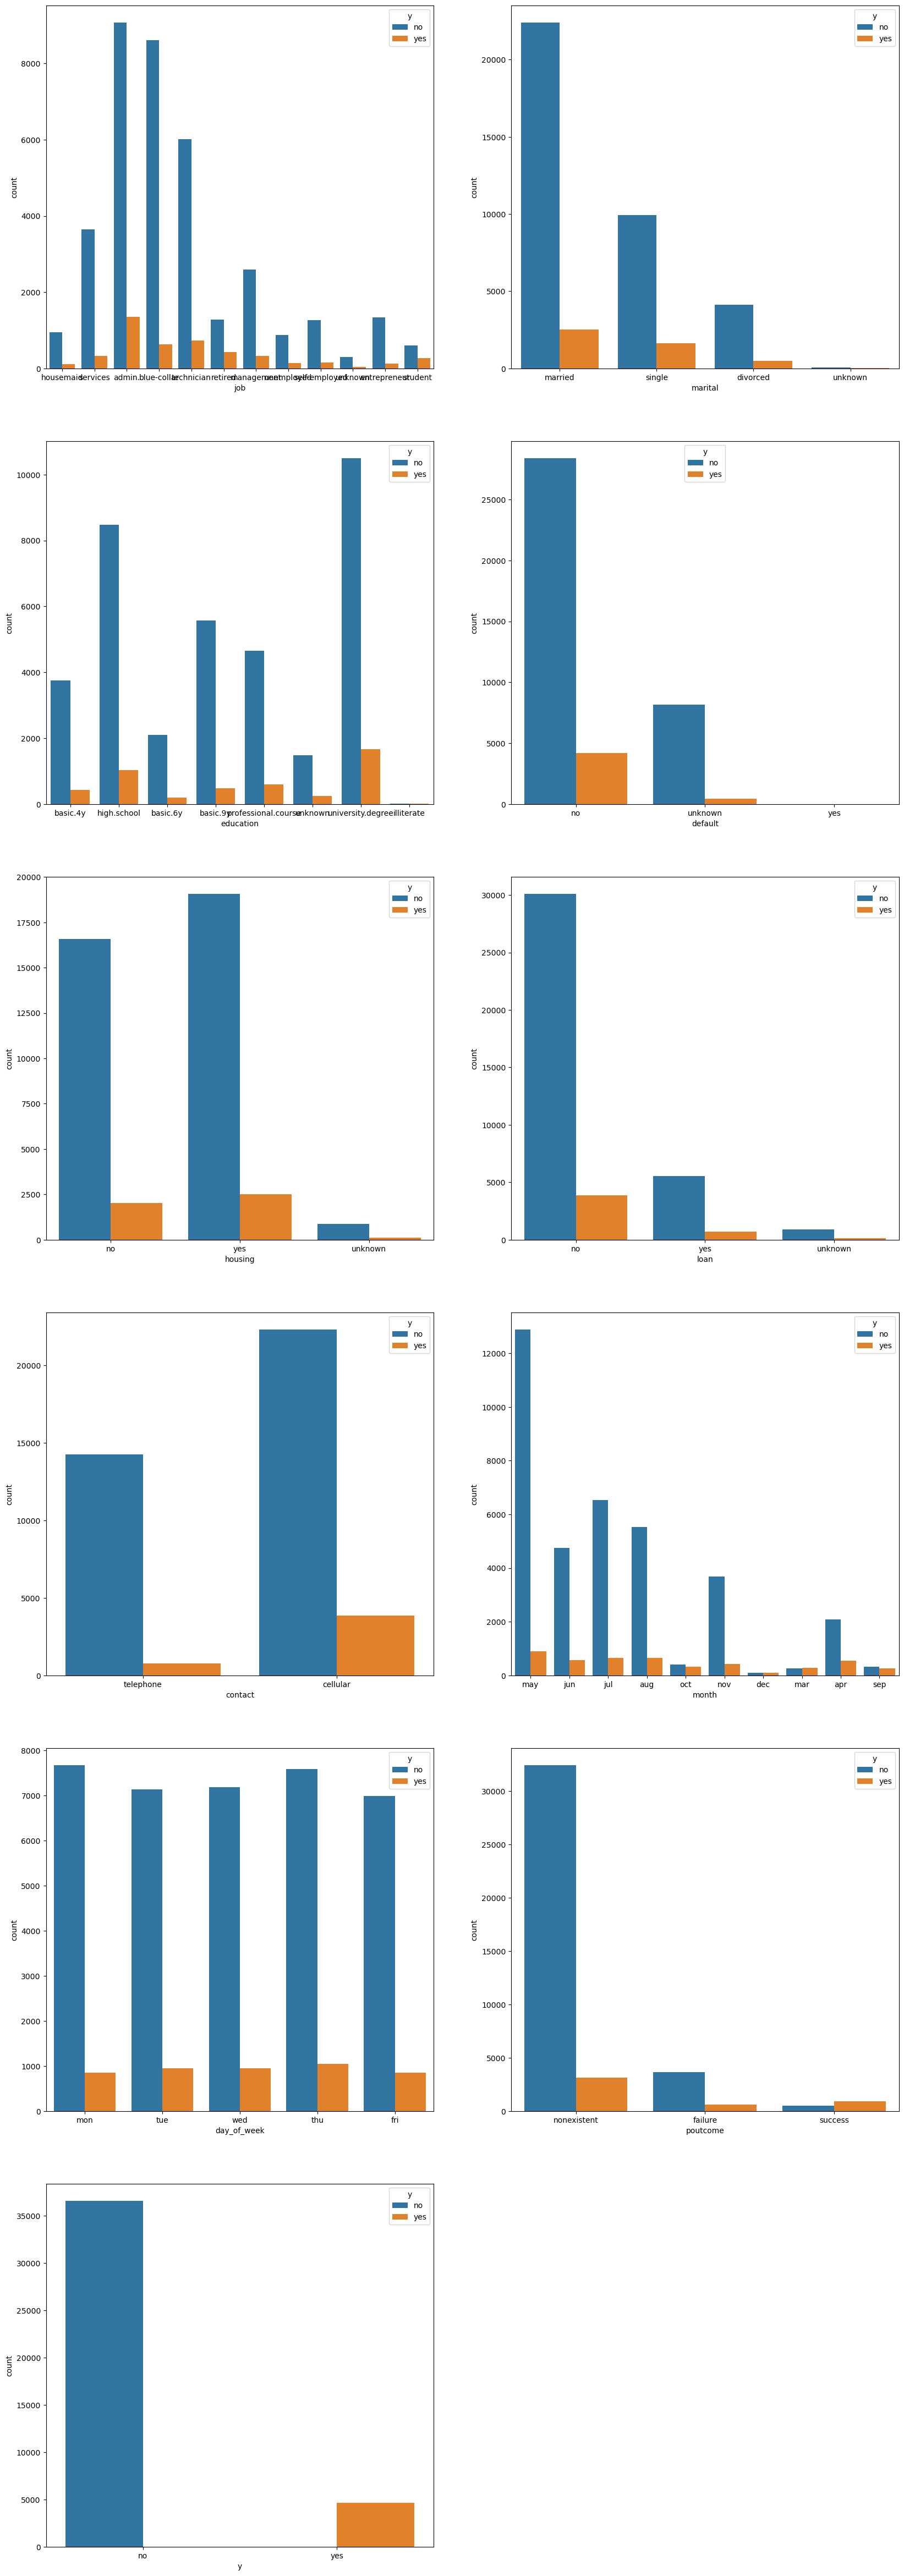

In [132]:
plt.figure(figsize = (20,60))
plt_cnt = 1
for i in cat_col: 
    plt.subplot(6,2,plt_cnt)
    sns.countplot(data[i],hue=data['y'])
    plt_cnt += 1

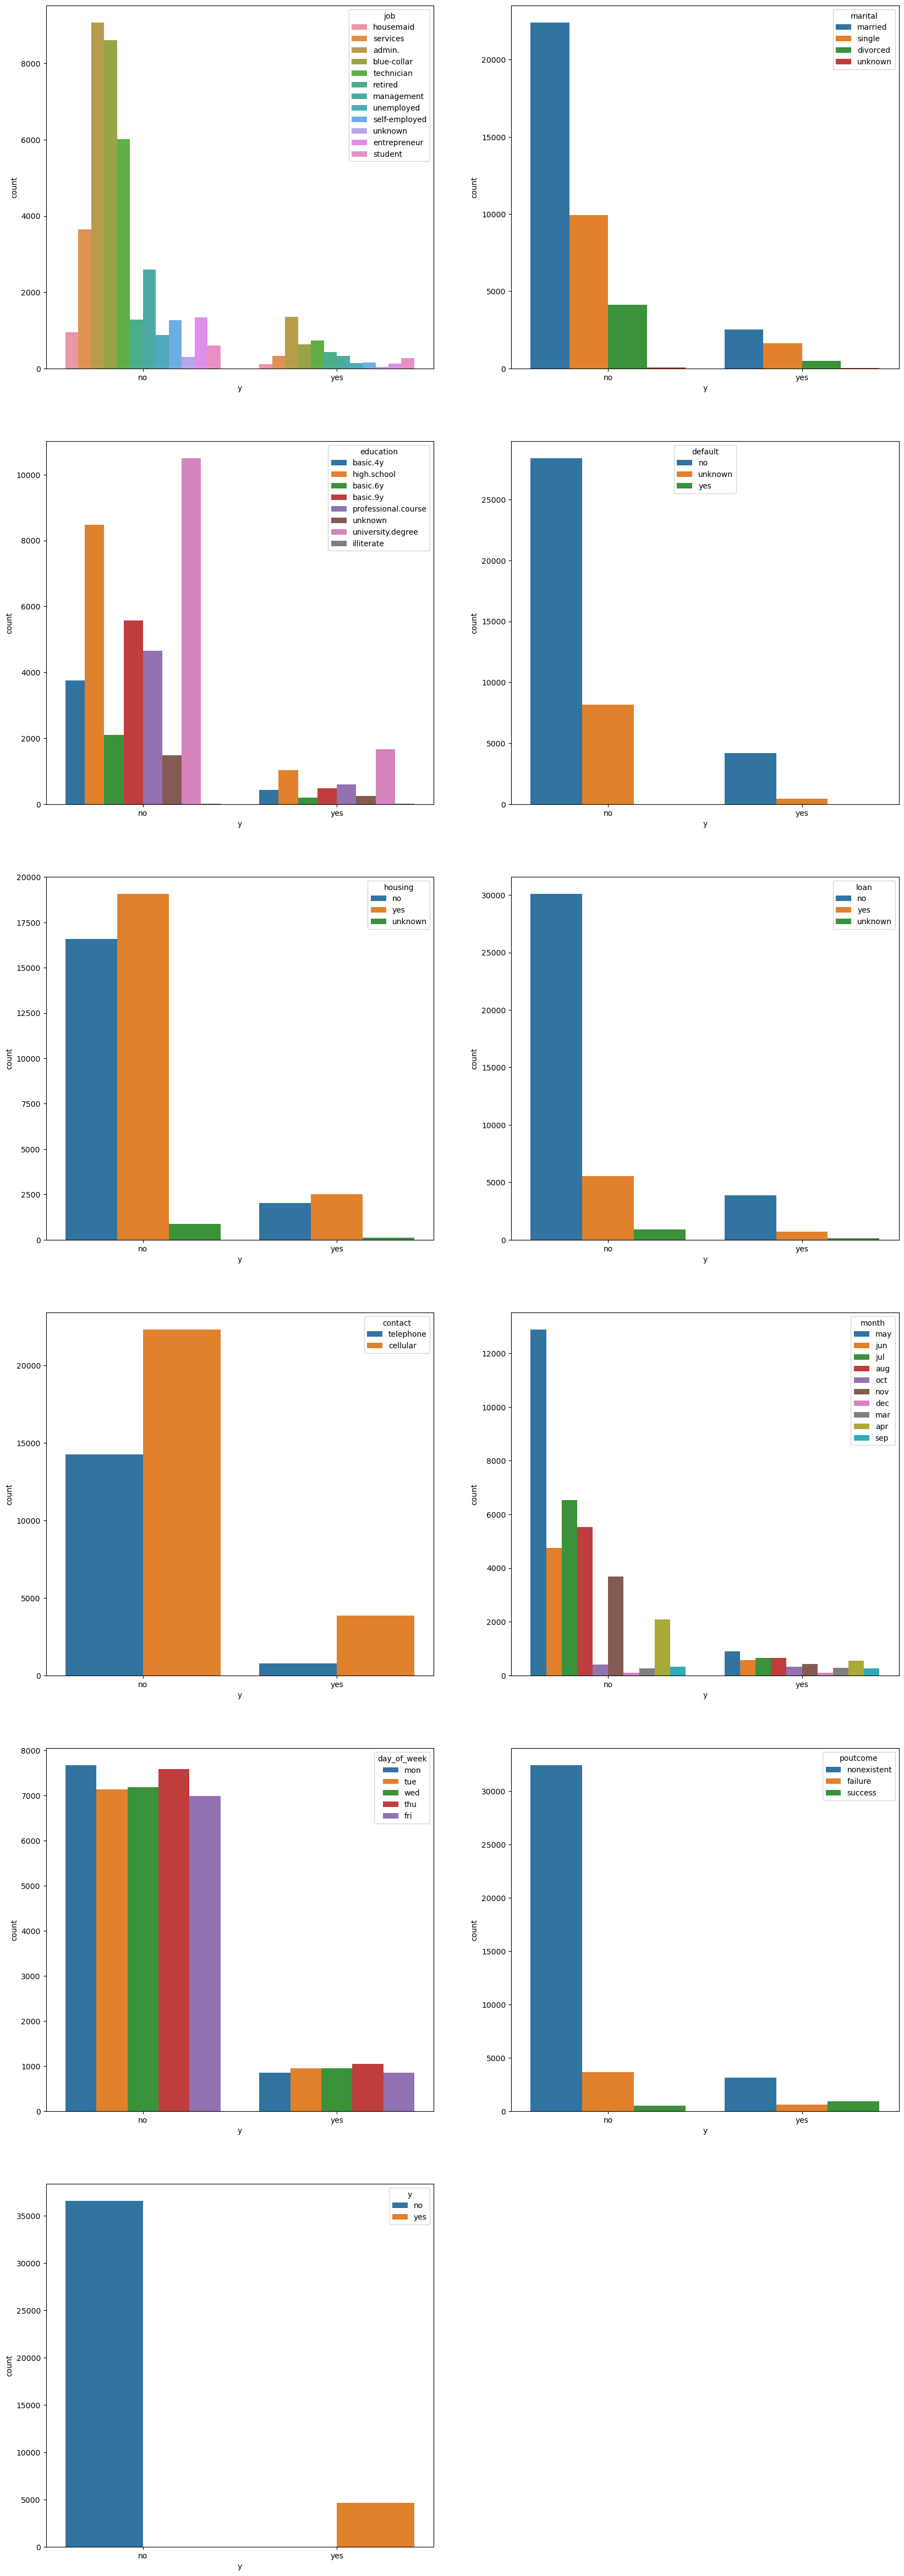

In [138]:
plt.figure(figsize = (20,60))
plt_cnt = 1
for i in cat_col: 
    plt.subplot(6,2,plt_cnt)
    sns.countplot(data['y'],hue=data[i])
    plt_cnt += 1

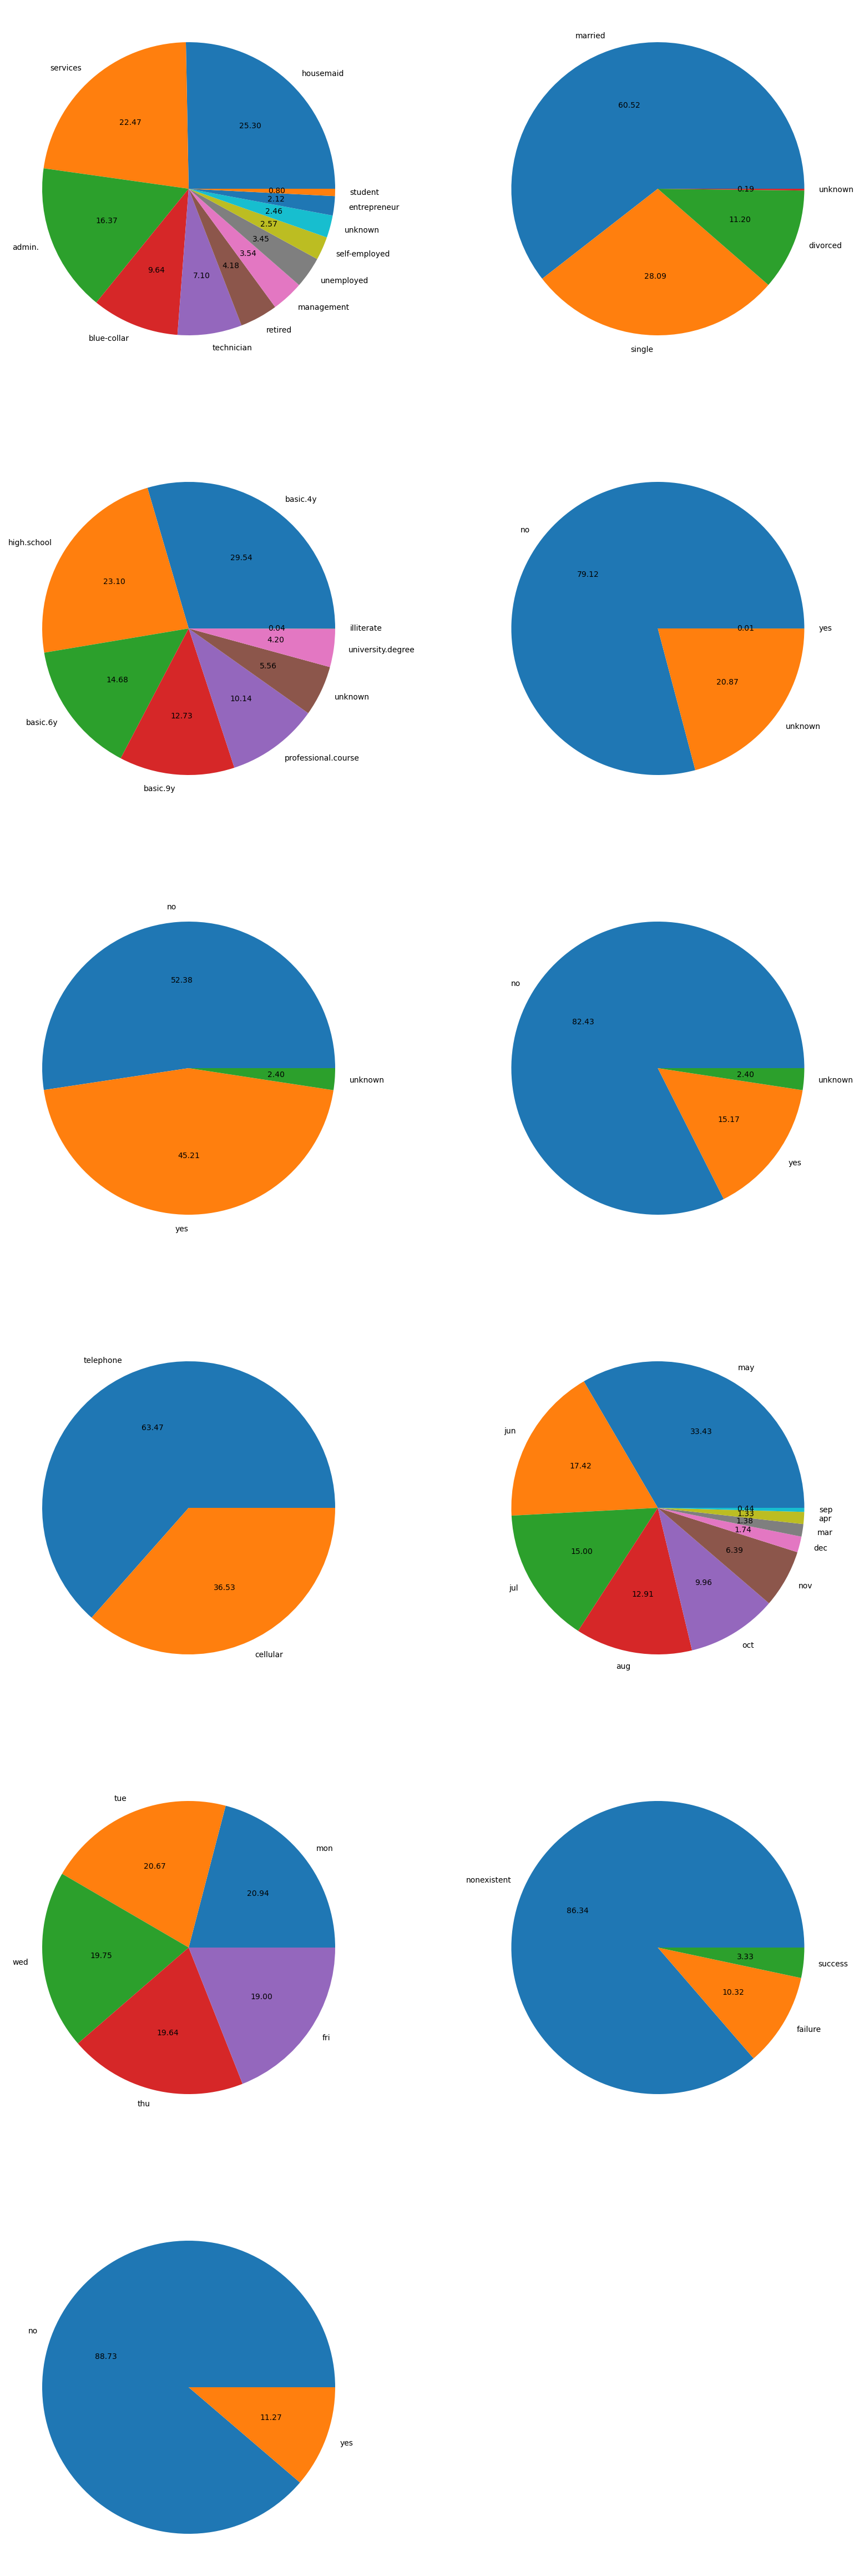

In [137]:
plt.figure(figsize = (20,60))
plt_cnt = 1
for i in cat_col: 
    plt.subplot(6,2,plt_cnt)
    plt.pie(data[i].value_counts(),labels = data[i].unique(),autopct='%.2f')
    plt_cnt += 1


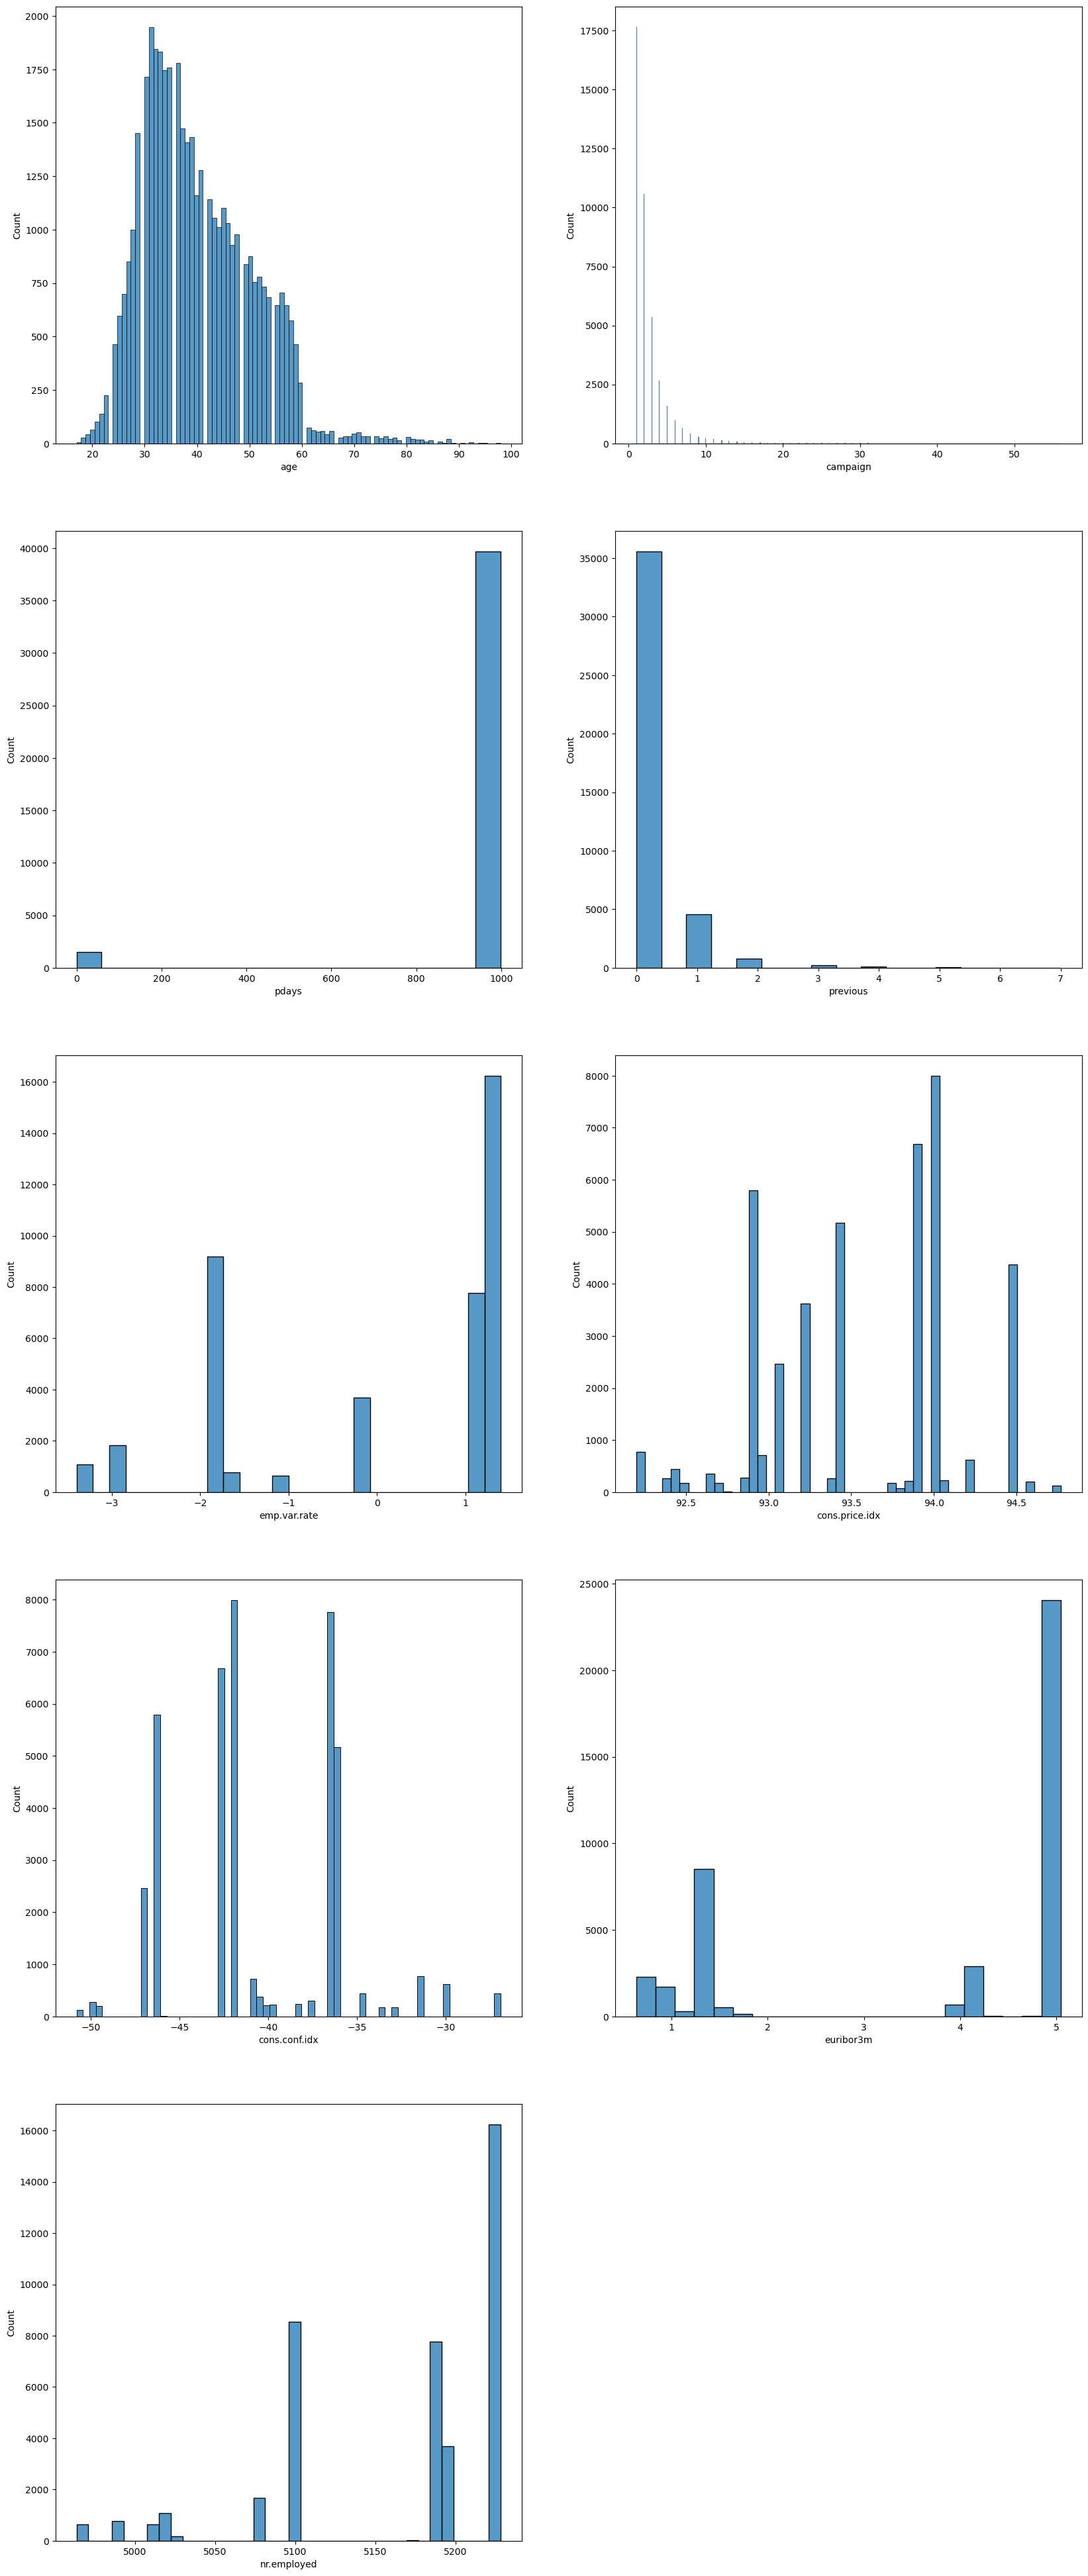

In [148]:
plt.figure(figsize=(20,60))
plt_num = 1
for i in cont_col:
    plt.subplot(6,2,plt_num)
    sns.histplot(data[i])
    plt_num+=1
    

In [133]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

## Insights from EDA
- Most of the people that were analysed are in services or housemaids. Most of them aged from 30-40. 60% of them were married. 50% of those enquired finished only their basic education or high school. 80% of them never defaulted, 82% people never had a loan, 63% were contacted on telephone. 32% people were contacted in may. 86% members werent a part of previous campaigns. 88.73% of people who were contacted, rejected to subsscribe to a term deposit. 
- There are some observations on those who were made to subscribe successfully for the term deposit.
- There has been good success rate of getting term deposit subscribed with retired people and admins
- There was higher chances of single people in subscribing to term deposit compared to married and divorced ones.
- There was higher chances of people with professional degree in subscribing to term deposit than those with other educations.
- People who had loan subscribed to the term deposit more than those who didn't have any loan
- Relatively august and october months had higher subscription to term deposit.
- People who successfully subscribed in previous marketing campaign subscribed this time too
- Higher success rate of subscribing to term deposit occured, when customers were reached on cellular phone.
- Most contacts were reached to for the first time.

In [31]:
data.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [ ]:
data.drop('duration',axis=1,inplace=True) #Since duration is directly impacting the output, its suggested to discard it for our study

In [72]:
data.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001250,-0.389753,-0.117892,0.164965,-0.001603,-0.007368,0.007021,-0.024877,-0.017572,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.001250,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006923,-0.028468,0.020965,0.011504,-0.008271,-0.016017,0.052760,-0.007880,-0.019574,0.025122
marital,-0.389753,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,-0.007240,-0.037942,0.038689,0.001912,-0.084210,-0.057477,-0.033783,-0.091939,-0.086199,0.046203
education,-0.117892,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,0.000371,-0.046626,0.038831,0.017009,-0.043778,-0.081607,0.078799,-0.036380,-0.041492,0.057799
default,0.164965,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,0.032825,0.080062,-0.102416,0.023417,0.203263,0.168073,0.026522,0.195336,0.189845,-0.099352
housing,-0.001603,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.011010,-0.010551,0.021314,-0.011783,-0.060196,-0.080504,-0.033845,-0.059277,-0.045862,0.011552
loan,-0.007368,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,0.005166,0.000345,-0.001327,-0.001511,0.001849,-0.002430,-0.012025,0.000125,0.003903,-0.004909
contact,0.007021,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,-0.024877,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,-0.062059,-0.047891,0.103157,-0.065012,-0.178782,-0.004239,0.009652,-0.117264,-0.221425,-0.006065
day_of_week,-0.017572,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,-0.038288,-0.009531,-0.004102,0.018732,0.033245,0.005644,0.041465,0.039043,0.028380,0.015967


<AxesSubplot:>

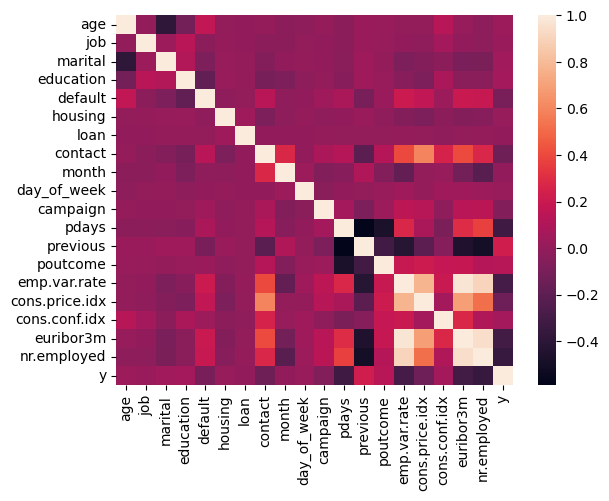

In [71]:
sns.heatmap(data.corr())

#### We see that there is high correlation between cons.price.idx, euribor3m,emp.var.rate and nr.employed columns. We hence drop them

In [73]:
data.drop(['cons.price.idx', 'euribor3m','emp.var.rate','nr.employed'],axis=1,inplace=True)

### Data Preprocessing - Encoding, Scaling balancing

In [74]:
#Encoding the categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [34]:
#cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact', 'month', 'day_of_week', 'poutcome','y']
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['day_of_week'] = le.fit_transform(data['day_of_week'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['y'] = le.fit_transform(data['y'])

In [75]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,-36.4,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,-36.4,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,-36.4,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,-36.4,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,-36.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,1,999,0,1,-50.8,1
41184,46,1,1,5,0,0,0,0,7,0,1,999,0,1,-50.8,0
41185,56,5,1,6,0,2,0,0,7,0,2,999,0,1,-50.8,0
41186,44,9,1,5,0,0,0,0,7,0,1,999,0,1,-50.8,1


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            41188 non-null  int64  
 1   job            41188 non-null  int64  
 2   marital        41188 non-null  int64  
 3   education      41188 non-null  int64  
 4   default        41188 non-null  int64  
 5   housing        41188 non-null  int64  
 6   loan           41188 non-null  int64  
 7   contact        41188 non-null  int64  
 8   month          41188 non-null  int64  
 9   day_of_week    41188 non-null  int64  
 10  campaign       41188 non-null  int64  
 11  pdays          41188 non-null  int64  
 12  previous       41188 non-null  int64  
 13  poutcome       41188 non-null  int64  
 14  cons.conf.idx  41188 non-null  float64
 15  y              41188 non-null  int64  
dtypes: float64(1), int64(15)
memory usage: 5.0 MB


In [77]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [78]:
data_scaled = mms.fit_transform(data.drop('y',axis=1))
col = data.drop('y',axis=1).columns
x = pd.DataFrame(data_scaled,columns=col)

In [79]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.0,0.000000,0.5,0.00000
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000


In [80]:
y = data.y

In [81]:
y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

### Train-test split and balancing

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [83]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_smote,y_smote = sm.fit_resample(x_train,y_train)
y_smote.value_counts()

0    27404
1    27404
Name: y, dtype: int64

## Modeling 
#### We'll use Logistic Regression, KNN, SVM, Decision Tree, Random Forest, Bagging, XGBoosting with hyper parameter tuning wherever possible

In [84]:
#DF for storing results of each model
Results = pd.DataFrame(index=['Accuracy','Precision','Recall','F1'])

In [85]:
#Importing metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#### Logistic Regression

In [86]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_smote,y_smote)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg'] = [acc,pr,re,f1]

Accuracy:  0.6506749538700592 
Precision:  0.18921668362156663 
Recall Score 0.645273200346921 
F1 Score 0.2926253687315634 
Confusion Matrix
 [[5956 3188]
 [ 409  744]]
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      9144
           1       0.19      0.65      0.29      1153

    accuracy                           0.65     10297
   macro avg       0.56      0.65      0.53     10297
weighted avg       0.85      0.65      0.71     10297



In [87]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg w/o balancing'] = [acc,pr,re,f1]

Accuracy:  0.8973487423521413 
Precision:  0.6297297297297297 
Recall Score 0.202081526452732 
F1 Score 0.30597504924491137 
Confusion Matrix
 [[9007  137]
 [ 920  233]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.94      9144
           1       0.63      0.20      0.31      1153

    accuracy                           0.90     10297
   macro avg       0.77      0.59      0.63     10297
weighted avg       0.88      0.90      0.87     10297



#### KNN Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_smote,y_smote)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN'] = [acc,pr,re,f1]

Accuracy:  0.7636204719821307 
Precision:  0.23696098562628337 
Recall Score 0.5004336513443192 
F1 Score 0.3216276477146042 
Confusion Matrix
 [[7286 1858]
 [ 576  577]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      9144
           1       0.24      0.50      0.32      1153

    accuracy                           0.76     10297
   macro avg       0.58      0.65      0.59     10297
weighted avg       0.85      0.76      0.80     10297



In [89]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN w/o balancing'] = [acc,pr,re,f1]

Accuracy:  0.8919102651257648 
Precision:  0.5452488687782805 
Recall Score 0.20901994796183868 
F1 Score 0.30219435736677114 
Confusion Matrix
 [[8943  201]
 [ 912  241]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9144
           1       0.55      0.21      0.30      1153

    accuracy                           0.89     10297
   macro avg       0.73      0.59      0.62     10297
weighted avg       0.87      0.89      0.87     10297



#### Support Vector Classifier

In [90]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_smote,y_smote)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM'] = [acc,pr,re,f1]

Accuracy:  0.7272020976983588 
Precision:  0.22727272727272727 
Recall Score 0.598438855160451 
F1 Score 0.3294342325137264 
Confusion Matrix
 [[6798 2346]
 [ 463  690]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      9144
           1       0.23      0.60      0.33      1153

    accuracy                           0.73     10297
   macro avg       0.58      0.67      0.58     10297
weighted avg       0.86      0.73      0.77     10297



In [91]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM w/o balancing'] = [acc,pr,re,f1]

Accuracy:  0.897154511022628 
Precision:  0.6211340206185567 
Recall Score 0.20901994796183868 
F1 Score 0.31278390655418564 
Confusion Matrix
 [[8997  147]
 [ 912  241]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9144
           1       0.62      0.21      0.31      1153

    accuracy                           0.90     10297
   macro avg       0.76      0.60      0.63     10297
weighted avg       0.88      0.90      0.87     10297



#### Decision Tree Classifier

In [92]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_smote,y_smote)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT'] = [acc,pr,re,f1]

Accuracy:  0.8329610566184326 
Precision:  0.2857142857142857 
Recall Score 0.32784041630529054 
F1 Score 0.3053311793214863 
Confusion Matrix
 [[8199  945]
 [ 775  378]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      9144
           1       0.29      0.33      0.31      1153

    accuracy                           0.83     10297
   macro avg       0.60      0.61      0.61     10297
weighted avg       0.84      0.83      0.84     10297



#### Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_smote,y_smote)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF'] = [acc,pr,re,f1]

Accuracy:  0.8835583179566864 
Precision:  0.47294117647058825 
Recall Score 0.34865568083261056 
F1 Score 0.40139790314528206 
Confusion Matrix
 [[8696  448]
 [ 751  402]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      9144
           1       0.47      0.35      0.40      1153

    accuracy                           0.88     10297
   macro avg       0.70      0.65      0.67     10297
weighted avg       0.87      0.88      0.88     10297



#### Bagging with KNN as base

In [94]:
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_smote,y_smote)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagging'] = [acc,pr,re,f1]

Accuracy:  0.7687676022142371 
Precision:  0.2426655490360436 
Recall Score 0.5021682567215958 
F1 Score 0.3272110765753038 
Confusion Matrix
 [[7337 1807]
 [ 574  579]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      9144
           1       0.24      0.50      0.33      1153

    accuracy                           0.77     10297
   macro avg       0.59      0.65      0.59     10297
weighted avg       0.85      0.77      0.80     10297



### XGBoosting

In [101]:
#XG Boosting
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_smote,y_smote)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB'] = [acc,pr,re,f1]

Accuracy:  0.8944352724094397 
Precision:  0.5553691275167785 
Recall Score 0.2870771899392888 
F1 Score 0.3785020011435106 
Confusion Matrix
 [[8879  265]
 [ 822  331]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      9144
           1       0.56      0.29      0.38      1153

    accuracy                           0.89     10297
   macro avg       0.74      0.63      0.66     10297
weighted avg       0.87      0.89      0.88     10297



In [102]:
#XG Boosting without balancing
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB w/o balancing'] = [acc,pr,re,f1]

Accuracy:  0.8963775857045742 
Precision:  0.5811320754716981 
Recall Score 0.26712922810060713 
F1 Score 0.36601307189542487 
Confusion Matrix
 [[8922  222]
 [ 845  308]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      9144
           1       0.58      0.27      0.37      1153

    accuracy                           0.90     10297
   macro avg       0.75      0.62      0.65     10297
weighted avg       0.88      0.90      0.88     10297



### The results are not great despite using SMOTE technique. We'll now try minority class upsampling, using sklearn resampling of minority class

In [97]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.0,0.000000,0.5,0.00000
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000


In [103]:
x['y'] = y

In [104]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251,0
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251,0
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251,0
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251,0
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.0,0.000000,0.5,0.60251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000,1
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000,0
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.0,0.000000,0.5,0.00000,0
41186,0.333333,0.818182,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.0,0.000000,0.5,0.00000,1


In [98]:
data.y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [105]:
pos_x = x.loc[x.y == 1]
pos_x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
75,0.296296,0.090909,0.000000,0.000000,0.5,1.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,1
83,0.395062,0.181818,0.333333,0.857143,0.5,1.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,1
88,0.395062,0.818182,0.333333,0.285714,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,1
129,0.296296,0.818182,0.333333,0.714286,0.5,1.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,1
139,0.345679,0.090909,0.333333,0.285714,0.5,1.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,0.555556,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.50,0.000000,0.001001,0.857143,1.0,0.00000,1
41178,0.555556,0.454545,0.333333,0.857143,0.0,0.0,0.0,0.0,0.777778,0.50,0.018182,0.006006,0.428571,1.0,0.00000,1
41181,0.246914,0.000000,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.000000,0.000000,0.5,0.00000,1
41183,0.691358,0.454545,0.333333,0.714286,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,1.000000,0.000000,0.5,0.00000,1


In [106]:
neg_x = x.loc[x.y==0]
neg_x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
0,0.481481,0.272727,0.333333,0.000000,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,0
1,0.493827,0.636364,0.333333,0.428571,0.5,0.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,0
2,0.246914,0.636364,0.333333,0.428571,0.0,1.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,0
3,0.283951,0.000000,0.333333,0.142857,0.0,0.0,0.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,0
4,0.481481,0.636364,0.333333,0.428571,0.0,0.0,1.0,1.0,0.666667,0.25,0.000000,1.000000,0.000000,0.5,0.60251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0.234568,0.000000,0.333333,0.857143,0.0,0.0,0.0,0.0,0.777778,0.00,0.018182,1.000000,0.000000,0.5,0.00000,0
41182,0.148148,0.909091,0.666667,0.000000,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,0.009009,0.142857,1.0,0.00000,0
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.000000,0.000000,0.5,0.00000,0
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.000000,0.000000,0.5,0.00000,0


In [107]:
from sklearn.utils import resample
pos_x_upsampled = resample(pos_x,replace=True,n_samples=36548,random_state=42)
data1 = pd.concat([pos_x_upsampled, neg_x])
data1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.conf.idx,y
19199,0.209877,0.818182,0.666667,0.857143,0.0,1.0,1.0,0.0,0.111111,1.00,0.036364,1.000000,0.000000,0.5,0.615063,1
39490,0.493827,0.272727,0.333333,0.000000,0.0,0.0,0.0,0.0,0.000000,1.00,0.018182,0.006006,0.142857,1.0,0.677824,1
38058,0.234568,0.000000,0.666667,0.857143,0.0,1.0,0.0,0.0,1.000000,0.00,0.018182,1.000000,0.000000,0.5,0.878661,1
12904,0.123457,0.000000,0.666667,0.714286,0.0,0.0,0.0,0.0,0.333333,0.75,0.018182,1.000000,0.000000,0.5,0.338912,1
40735,0.530864,0.454545,0.333333,0.428571,0.0,0.0,0.0,0.0,1.000000,1.00,0.000000,0.006006,0.142857,1.0,0.556485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41180,0.234568,0.000000,0.333333,0.857143,0.0,0.0,0.0,0.0,0.777778,0.00,0.018182,1.000000,0.000000,0.5,0.000000,0
41182,0.148148,0.909091,0.666667,0.000000,0.0,1.0,0.0,0.0,0.777778,0.00,0.000000,0.009009,0.142857,1.0,0.000000,0
41184,0.358025,0.090909,0.333333,0.714286,0.0,0.0,0.0,0.0,0.777778,0.00,0.000000,1.000000,0.000000,0.5,0.000000,0
41185,0.481481,0.454545,0.333333,0.857143,0.0,1.0,0.0,0.0,0.777778,0.00,0.018182,1.000000,0.000000,0.5,0.000000,0


In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data1.drop('y',axis=1),data1.y,test_size=0.25,random_state=42)

In [109]:
# Logreg with minority resampling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
LR = LogisticRegression()
LR.fit(x_train,y_train)
y_pred = LR.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['LogReg with min_resampling'] = [acc,pr,re,f1]

Accuracy:  0.6594615300426836 
Precision:  0.6644503546099291 
Recall Score 0.6523773256446523 
F1 Score 0.6583584957452648 
Confusion Matrix
 [[6055 3028]
 [3195 5996]]
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      9083
           1       0.66      0.65      0.66      9191

    accuracy                           0.66     18274
   macro avg       0.66      0.66      0.66     18274
weighted avg       0.66      0.66      0.66     18274



In [110]:
#KNN with minority resampling
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN with min_resampling'] = [acc,pr,re,f1]

Accuracy:  0.8643427820947794 
Precision:  0.8043714855795393 
Recall Score 0.964965727341965 
F1 Score 0.877380422416778 
Confusion Matrix
 [[6926 2157]
 [ 322 8869]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      9083
           1       0.80      0.96      0.88      9191

    accuracy                           0.86     18274
   macro avg       0.88      0.86      0.86     18274
weighted avg       0.88      0.86      0.86     18274



In [111]:
#DT with minority resampling
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['DT with minority resampling'] = [acc,pr,re,f1]

Accuracy:  0.9426507606435373 
Precision:  0.8992058044906364 
Recall Score 0.9978239582199978 
F1 Score 0.945951521402785 
Confusion Matrix
 [[8055 1028]
 [  20 9171]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      9083
           1       0.90      1.00      0.95      9191

    accuracy                           0.94     18274
   macro avg       0.95      0.94      0.94     18274
weighted avg       0.95      0.94      0.94     18274



In [112]:
#RF with minority resampling
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)
y_pred = rf_clf.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['RF min_resampling'] = [acc,pr,re,f1]

Accuracy:  0.9642661705154865 
Precision:  0.9356122448979591 
Recall Score 0.9976063540419976 
F1 Score 0.9656152914538464 
Confusion Matrix
 [[8452  631]
 [  22 9169]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9083
           1       0.94      1.00      0.97      9191

    accuracy                           0.96     18274
   macro avg       0.97      0.96      0.96     18274
weighted avg       0.97      0.96      0.96     18274



In [116]:
#SVC with minority resampling
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['SVM with min_resampling'] = [acc,pr,re,f1]

Accuracy:  0.7096968370362263 
Precision:  0.7814310544611819 
Recall Score 0.5869872701555869 
F1 Score 0.670394532463498 
Confusion Matrix
 [[7574 1509]
 [3796 5395]]
              precision    recall  f1-score   support

           0       0.67      0.83      0.74      9083
           1       0.78      0.59      0.67      9191

    accuracy                           0.71     18274
   macro avg       0.72      0.71      0.71     18274
weighted avg       0.72      0.71      0.71     18274



In [115]:
#Bagging with KNN as base
from sklearn.ensemble import BaggingClassifier
model_bagg=BaggingClassifier(base_estimator=KNN,n_estimators=20)
model_bagg.fit(x_train,y_train)  
y_pred=model_bagg.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['KNN Bagging min_resampling'] = [acc,pr,re,f1]

Accuracy:  0.8689941994089964 
Precision:  0.8112464511402143 
Recall Score 0.9637689043629638 
F1 Score 0.8809547488811537 
Confusion Matrix
 [[7022 2061]
 [ 333 8858]]
              precision    recall  f1-score   support

           0       0.95      0.77      0.85      9083
           1       0.81      0.96      0.88      9191

    accuracy                           0.87     18274
   macro avg       0.88      0.87      0.87     18274
weighted avg       0.88      0.87      0.87     18274



In [117]:
# XGB with minority resampling
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(x_train,y_train)
y_pred = xgbc.predict(x_test)

acc = accuracy_score(y_test,y_pred)
pr = precision_score(y_test,y_pred)
re = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print('Accuracy: ',acc,'\nPrecision: ',pr,'\nRecall Score', re,'\nF1 Score', f1, '\nConfusion Matrix\n', cm)
print(classification_report(y_test,y_pred))
Results['XGB with min_resampling'] = [acc,pr,re,f1]

Accuracy:  0.8011382291780672 
Precision:  0.8521992647990874 
Recall Score 0.7314764443477315 
F1 Score 0.7872365339578453 
Confusion Matrix
 [[7917 1166]
 [2468 6723]]
              precision    recall  f1-score   support

           0       0.76      0.87      0.81      9083
           1       0.85      0.73      0.79      9191

    accuracy                           0.80     18274
   macro avg       0.81      0.80      0.80     18274
weighted avg       0.81      0.80      0.80     18274



In [118]:
Results

,LogReg,LogReg w/o balancing,KNN,KNN w/o balancing,SVM,SVM w/o balancing,DT,RF,KNN Bagging,XGB,XGB w/o balancing,LogReg with min_resampling,KNN with min_resampling,DT with minority resampling,RF min_resampling,KNN Bagging min_resampling,SVM with min_resampling,XGB with min_resampling
Accuracy,0.650675,0.897349,0.763620,0.891910,0.727202,0.897155,0.832961,0.883558,0.768768,0.894435,0.896378,0.659462,0.864343,0.942651,0.964266,0.868994,0.709697,0.801138
Precision,0.189217,0.629730,0.236961,0.545249,0.227273,0.621134,0.285714,0.472941,0.242666,0.555369,0.581132,0.664450,0.804371,0.899206,0.935612,0.811246,0.781431,0.852199
Recall,0.645273,0.202082,0.500434,0.209020,0.598439,0.209020,0.327840,0.348656,0.502168,0.287077,0.267129,0.652377,0.964966,0.997824,0.997606,0.963769,0.586987,0.731476
F1,0.292625,0.305975,0.321628,0.302194,0.329434,0.312784,0.305331,0.401398,0.327211,0.378502,0.366013,0.658358,0.877380,0.945952,0.965615,0.880955,0.670395,0.787237


## Conclusions
- We are given data of various parameters and we are supposed to do a data analysis, that provides insights of what kind of parameters are driving the customer to buy the loan and provide relevant suggestions to bank
#### Relevant Suggestions to bank
- Success in getting subscribed to term deposit happened with people in administrative jobs, single (unmarried) or retired people. So, try targeting the other job holders and aim at designing the benefits to them.
- Reach out to retired people or single people more (as they had better success rate), contact them on cellular than telephone, to increase success rate of a campaign. 
- Similarly, design campaigns that they end up being attractive to those who already have a loan to repay and those married people.
#### Predictive Modeling 
- We are to build a predictive model that concludes if a customer is subscribing the term deposit or not, based on values of features.
- Since data is balanced, we applied SMOTE as well as minority resampling techniques to balance the data. Minority resampling technique of sklearn seems to be yielding good results of data balancing.
- Since this is a binary classification problem, we used Logistic Regression, KNN, SVM Classifier, Decision Tree, Random Forest, Bagging with KNN as base and XG Boosting algorithms and the results are summarised as above.
- Based on that we see that Random Forest Classifier with minority resampling has been able to deliver a F1 score of 96%, followed by Decision Tree model with 95% F1 score. Both yeilded accuracy of 96% and 94% respectively.
- It is to be noted, that KNN model with minority resampling also yeilded good results with F1 of 88%.